In [3]:
# Use this if receiving from UDP socket and saving

# Connect to the ESP_8C1FB2 wifi hotspot

import socket
s = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
s.settimeout(3)
espipnum = "192.168.4.1"
port = 9019

#s.bind((ipnum, port))   
s.sendto(b"HiThereAMRC", (espipnum, port))
header = s.recvfrom(200)
print(header)


(b'n,t,qw,qx,qy,qz,lx,ly,lz,gx,gy,gz,temp,calibstat\n', ('192.168.4.1', 9019))


In [6]:
for i in range(10):
    print(s.recvfrom(200)[0])

b'20,25152,11983,-11140,862,-1,0.03,0.16,0.11,-0.75,-9.75,0.68,27,0\n'
b'21,25178,11984,-11139,862,-1,0.04,0.17,0.01,-0.75,-9.75,0.68,27,0\n'
b'22,25203,11984,-11139,862,-1,0.01,0.18,0.05,-0.75,-9.75,0.68,27,0\n'
b'23,25228,11984,-11139,862,-1,0.00,0.11,-0.05,-0.75,-9.75,0.68,27,0\n'
b'24,25253,11984,-11139,862,-1,0.03,0.10,0.00,-0.75,-9.75,0.68,27,0\n'
b'25,25277,11984,-11139,862,-1,0.06,0.05,-0.04,-0.75,-9.75,0.68,27,0\n'
b'26,25301,11984,-11139,862,-1,0.06,0.10,0.04,-0.75,-9.75,0.68,27,48\n'
b'27,25314,11984,-11139,862,-1,0.05,0.11,0.04,-0.75,-9.75,0.68,27,48\n'
b'28,25360,11984,-11139,862,-1,0.03,0.16,0.07,-0.75,-9.75,0.68,27,48\n'
b'29,25384,11984,-11139,862,-1,0.02,0.14,0.00,-0.75,-9.75,0.68,27,48\n'


In [7]:
# Now read changes in 
prevcalibstat = 0
for i in range(10000):
    v = s.recvfrom(200)
    calibstat = int(v[0].split(b",")[-1])
    if calibstat != prevcalibstat:
        print("Sys:%d Gyr:%d Acc:%d Mag:%d" % \
              ((calibstat&0xC0)>>6, (calibstat&0x30)>>4, (calibstat&0x0C)>>2, calibstat%0x03))
        prevcalibstat = calibstat

Sys:0 Gyr:3 Acc:0 Mag:0
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:3 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:0 Gyr:3 Acc:0 Mag:0
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:0 Gyr:3 Acc:0 Mag:0
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:0 Gyr:3 Acc:0 Mag:0
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:0 Gyr:3 Acc:0 Mag:0
Sys:1 Gyr:3 Acc:0 Mag:1
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:2 Gyr:3 Acc:0 Mag:2
Sys:3 Gyr:3 Acc:0 Mag:0
Sys:3 Gyr:3 Acc:1 Mag:1
Sys:3 Gyr:3 Acc:3 Mag:0
Sys:2 Gyr:3 Acc:3 Mag:2
Sys:1 Gyr:3 Acc:3 Mag:1
Sys:0 Gyr:3 Acc:3 Mag:0
Sys:1 Gyr:3 Acc:

KeyboardInterrupt: 

In [9]:
import pandas as pd
print(s.recvfrom(200)[0])
Time0 = pd.Timestamp.now()

b'11690,318308,11586,3751,-10734,2213,0.02,0.05,0.00,9.69,1.44,0.35,29,254\n'


In [10]:
def recwrite(fname, nsamples):
    header = b'n,t,qw,qx,qy,qz,lx,ly,lz,gx,gy,gz,temp,calibstat\n'
    m = [ header ]
    for i in range(500):
        s.recvfrom(200)  # clear buffered
    for i in range(1000):
        v = s.recvfrom(200)[0]
        m.append(v)
        if (i%100) == 0:
            print(v)
    open(fname, "wb").write(b"".join(m))
recwrite("pendulumdata3_rest.csv", 1000)  # try 9


b'17581,465915,11632,3887,-10595,2403,0.04,0.04,-0.10,9.68,1.44,0.50,29,254\n'
b'17681,468554,11636,3879,-10594,2397,0.01,0.02,-0.17,9.68,1.44,0.50,30,254\n'
b'17781,470985,11642,3878,-10588,2399,0.02,0.01,-0.08,9.68,1.44,0.51,30,254\n'
b'17881,473505,11646,3873,-10586,2396,0.02,0.02,-0.11,9.68,1.44,0.52,29,254\n'
b'17981,476051,11646,3875,-10584,2398,0.01,0.04,-0.11,9.68,1.44,0.52,29,254\n'
b'18081,478489,11646,3874,-10585,2398,0.05,0.04,-0.12,9.68,1.44,0.52,29,254\n'
b'18181,480900,11651,3873,-10580,2399,0.05,0.03,-0.10,9.68,1.44,0.53,29,254\n'
b'18281,483444,11652,3870,-10580,2397,0.02,0.04,-0.17,9.68,1.44,0.53,29,254\n'
b'18381,486103,11649,3869,-10584,2394,0.00,0.02,-0.14,9.68,1.44,0.52,29,254\n'
b'18481,488514,11649,3870,-10584,2395,0.02,0.02,-0.11,9.68,1.44,0.52,29,254\n'


In [11]:

from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
Time0 = pd.Timestamp.now()

def readproc(fname):
    m = pd.read_csv(fname)
    m["t"] = Time0 + m.t*pd.Timedelta(1e6)
    m.set_index(["t"], inplace=True)
    m.index.name = None
    return m

m = readproc("pendulumdata1_rest.csv")
m.head()


,n,qw,qx,qy,qz,lx,ly,lz,gx,gy,gz,temp,calibstat
2018-11-12 13:29:20.636977,85682,-5629,11714,2377,9690,0.09,0.15,-0.04,9.27,-3.13,-0.63,26,61
2018-11-12 13:29:20.660977,85683,-5632,11713,2375,9689,0.16,0.12,-0.10,9.26,-3.13,-0.62,26,61
2018-11-12 13:29:20.684977,85684,-5632,11713,2375,9689,0.07,0.12,-0.06,9.26,-3.13,-0.62,26,61
2018-11-12 13:29:20.750977,85685,-5628,11712,2381,9692,0.15,0.07,-0.04,9.27,-3.12,-0.62,26,61
2018-11-12 13:29:20.774977,85686,-5628,11712,2381,9692,0.13,0.06,-0.16,9.27,-3.12,-0.62,26,61


In [79]:
#x = m.index.to_series().diff()
#m[x>pd.Timedelta(seconds=0.1)]
dir(m.qx)



['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

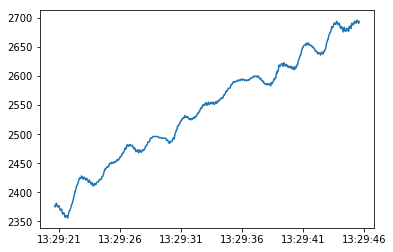

In [18]:
#plt.plot(m.lx); plt.plot(m.ly); plt.plot(m.lz)
#plt.plot(m.gx); plt.plot(m.gy); plt.plot(m.gz)
import numpy as np
#plt.plot(np.sqrt(m.gx**2 + m.gy**2 + m.gz**2))
plt.plot(m.qy)


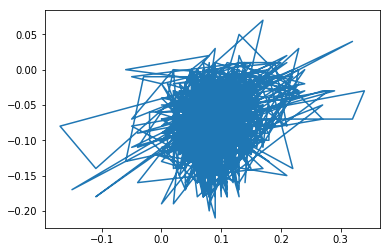

In [19]:
plt.plot(m.ly, m.lz)


In [21]:
#plt.plot(m.lx); plt.plot(m.ly); plt.plot(m.lz)
#plt.plot(m.gx-m.gx.mean()); plt.plot(m.gy-m.gy.mean()); plt.plot(m.gz-m.gz.mean())
#plt.plot(m.gz)
import numpy as np
# qdown is the stationary rotation
qdown = (m.qw.mean(), m.qx.mean(), m.qy.mean(), m.qz.mean())
# vg is the gravity vector
vg = np.array((m.gx.mean(), m.gy.mean(), m.gz.mean()))
vg

array([ 9.27   , -3.11732, -0.61924])

In [23]:
def qmult(q, r):
    return (q[0]*r[0] - q[1]*r[1] - q[2]*r[2] - q[3]*r[3], 
            q[0]*r[1] + q[1]*r[0] + q[2]*r[3] - q[3]*r[2], 
            q[0]*r[2] - q[1]*r[3] + q[2]*r[0] + q[3]*r[1], 
            q[0]*r[3] + q[1]*r[2] - q[2]*r[1] + q[3]*r[0])

def qconj(q):
    return (q[0], -q[1], -q[2], -q[3])

def tv(q, p):
    qsq = q[0]**2 + q[1]**2 + q[2]**2 + q[3]**2
    rp = qmult(qconj(q), qmult([0,p[0],p[1],p[2]], q))
    #rp = qmult(qmult(q, [0,p[0],p[1],p[2]]), qconj(q))
    return np.array((rp[1]/qsq, rp[2]/qsq, rp[3]/qsq))

#qdown = (10020,-5932,-11199,-2725)
#qdown = (9956,-5698,-11471,-2296)
#print(qmult(qdown, qconj(qdown)), qmult(qconj(qdown), qdown))
vg

array([ 9.27   , -3.11732, -0.61924])

In [24]:
import math
# gravity vector checks
gabs = math.sqrt(sum(vg**2))
print("value of g", gabs)
#tv(qdown, (0,0,1)) - vg/gabs
print("rotate vg by the rotation vector so it points up")
print(tv(qconj(qdown), vg))



value of g 9.799696023857198
rotate vg by the rotation vector so it points up
[5.13608897e-03 1.26983663e-03 9.79969460e+00]


In [25]:
# Now do a pendulum swinging
recwrite("pendulumdata3.csv", 1000)

b'32831,849717,13601,787,-8279,-3781,1.79,-2.02,-3.90,8.00,3.06,4.75,30,255\n'
b'32931,852299,10441,6416,-8339,6980,1.18,0.56,-0.71,9.63,0.64,1.71,30,63\n'
b'33031,854664,10901,1969,-11864,2225,-0.13,1.40,1.59,9.77,-0.36,-0.76,30,63\n'
b'33131,857304,12373,3847,-9956,1190,1.34,-1.47,-0.47,9.33,2.61,1.48,30,63\n'
b'33231,859672,11822,6061,-8827,3744,0.16,-1.84,-0.52,9.28,2.82,1.42,30,127\n'
b'33331,862037,11792,3221,-10475,3047,0.26,0.65,-0.27,9.74,0.44,1.03,30,63\n'
b'33431,864443,10680,3774,-10962,4468,0.06,1.67,1.00,9.78,-0.63,-0.01,30,63\n'
b'33531,866714,11224,3556,-10910,3286,-0.35,0.73,0.61,9.80,0.29,0.18,30,191\n'
b'33631,869054,11939,4460,-9953,2634,0.78,-0.91,-0.07,9.54,1.97,1.11,30,63\n'
b'33731,871420,12177,4847,-9467,2656,0.22,-1.48,-0.67,9.36,2.47,1.54,30,191\n'


In [26]:
m = readproc("pendulumdata3.csv")
vg

array([ 9.27   , -3.11732, -0.61924])

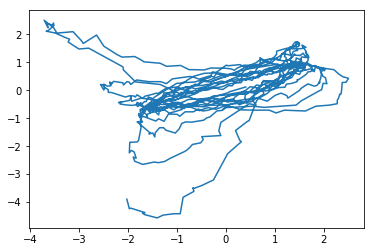

In [27]:
plt.plot(m.ly, m.lz)
#plt.plot(m.gx**2 + m.gy**2 + m.gz**2)


In [28]:
# when the pendulum swings the rotation (relative to the axes with z up the string)
m["rw"], m["rx"], m["ry"], m["rz"] = qmult((m.qw, m.qx, m.qy, m.qz), qconj(qdown))
# string up vector in real coordinates is:
m["Sx"], m["Sy"], m["Sz"] = tv((m.rw, m.rx, m.ry, m.rz), (0,0,1))
# put the acceleration into real coordinates
m["Ax"], m["Ay"], m["Az"] = tv((m.qw, -m.qx, -m.qy, -m.qz), (m.lx, m.ly, m.lz))
# the gravity vector in real coordinates is just (0,0,9.8)
m["Gx"], m["Gy"], m["Gz"] = tv((m.qw, -m.qx, -m.qy, -m.qz), (m.gx, m.gy, m.gz))

In [29]:
# pendulum force (sideways)
m["Sxyl"] = np.sqrt(m.Sx**2 + m.Sy**2)
Pfac = 9.81*m["Sxyl"]
m["Px"] = m.Sx*(m.Sz/m.Sxyl)*Pfac
m["Py"] = m.Sy*(m.Sz/m.Sxyl)*Pfac
m["Pz"] = -m.Sxyl*Pfac

In [30]:
AdotS = m.Sx*m.Ax + m.Sy*m.Ay + m.Sz*m.Az
m["Bx"], m["By"], m["Bz"] = \
    m["Ax"]-AdotS*m["Sx"], m["Ay"]-AdotS*m["Sy"], m["Az"]-AdotS*m["Sz"]

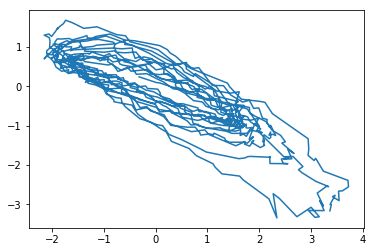

In [32]:
plt.plot(m["Ax"], m["Ay"])

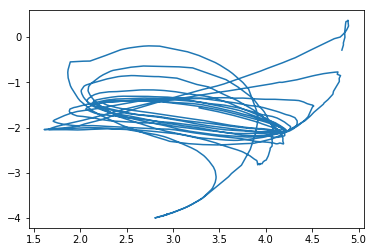

In [33]:
m1 = m.iloc[:]
plt.plot(m1.Px, m1.Py)


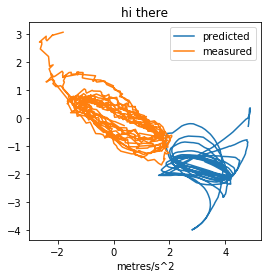

In [34]:
plt.gca().set_aspect('equal')
plt.plot(m.Px, m.Py, label="predicted")
plt.plot(-m["Bx"], -m["By"], label="measured")
plt.xlabel("metres/s^2")
plt.title("hi there")
plt.legend()

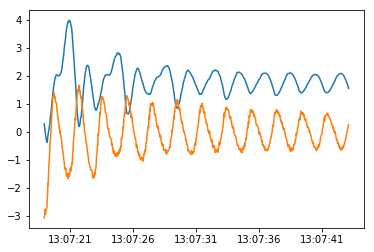

In [35]:
#plt.plot(m["Sxyl"])
plt.plot(-m.Py)
plt.plot(m.By)


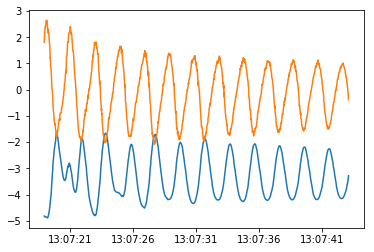

In [36]:
plt.plot(-m.Px)
plt.plot(m.Bx)


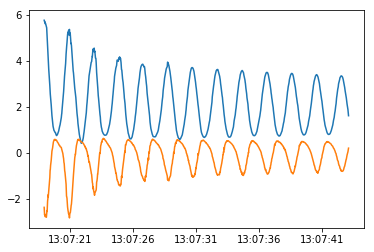

In [39]:
plt.plot(-m.Pz)
plt.plot(m.Bz)


In [620]:
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)

In [621]:
x = sp.Symbol("x")

In [629]:
sp.integrate(x**3 + x**(-1))


In [205]:
g = sp.Symbol("g", positive=True)
t = sp.Symbol("t", real=True)
l = sp.Symbol("l", positive=True)
#theta0 = sp.Symbol("theta_0", positive=True)
theta = sp.Function("theta")(t)
theta

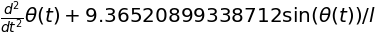

In [203]:
q = sp.diff(sp.diff(theta)) + g/l * sp.sin(theta)
q

In [170]:
q = sp.diff(sp.diff(theta)) + g/l * theta
H = sp.dsolve(q, theta)
H

In [184]:
type(H)

sympy.core.relational.Equality

In [186]:
q = sp.Derivative(sp.Derivative(theta)) + g/l * sp.sin(theta)
q
H = sp.dsolve(q, theta)
H

NotImplementedError: solve: Cannot solve g*sin(theta(t))/l + Derivative(theta(t), (t, 2))

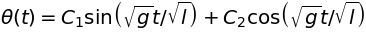

In [180]:
q = sp.Derivative(sp.Derivative(theta)) + g/l * theta
q
H = sp.dsolve(q, theta)
H

In [175]:
H.rhs

In [177]:
k = sp.diff(sp.diff(H.rhs, t), t) + g/l*H.rhs
k.simplify()

In [178]:
H.rhs.simplify()

In [188]:
theta0 = sp.Symbol("theta_0", positive=True)
theta0

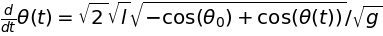

In [194]:
e2 = sp.Eq(sp.diff(theta, t), sp.sqrt(2*l/g * (sp.cos(theta) - sp.cos(theta0))))
e2

In [201]:
sp.Derivative(e2.rhs, t).doit().subs(e2.lhs, e2.rhs)

In [40]:
import plotly.graph_objs as go 

#plt.plot(m.ly, m.lz)
fig = go.FigureWidget(data=[dict(type="scattergl",x=list(m.ly), y=list(m.lz), mode="markers")])
from plotly.offline import iplot
iplot(fig)

In [41]:
fig

FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scattergl',
              'uid': '8b0ca…

In [24]:
s = fig.data[0]

In [25]:
s.marker.size=1

In [43]:
m

,n,qw,qx,qy,qz,lx,ly,lz,gx,gy,...,Gx,Gy,Gz,Sxyl,Px,Py,Pz,Bx,By,Bz
2018-11-12 13:07:18.969977,32831,13601,787,-8279,-3781,1.79,-2.02,-3.90,8.00,3.06,...,-0.003710,-0.004499,9.794185,0.766679,4.820090,-0.289706,-5.766292,1.804943,-3.072838,-2.371637
2018-11-12 13:07:19.003977,32832,13634,606,-8215,-3833,1.23,-1.97,-4.24,8.01,2.90,...,0.004446,-0.003758,9.797738,0.762343,4.836767,-0.175233,-5.701244,2.186837,-2.963480,-2.700701
2018-11-12 13:07:19.016977,32833,13654,562,-8172,-3861,1.25,-1.94,-4.22,7.99,2.86,...,-0.000214,-0.004338,9.799474,0.763216,4.836010,-0.130579,-5.714310,2.178744,-2.972315,-2.667328
2018-11-12 13:07:19.041977,32834,13687,362,-8114,-3891,1.05,-1.65,-4.38,8.01,2.66,...,0.001923,-0.008567,9.799797,0.756782,4.852842,-0.006402,-5.618375,2.379314,-2.769015,-2.758874
2018-11-12 13:07:19.053977,32835,13702,324,-8080,-3911,0.98,-1.70,-4.40,7.99,2.63,...,0.003353,-0.001902,9.795784,0.757234,4.851759,0.030450,-5.625090,2.414299,-2.812056,-2.778548
2018-11-12 13:07:19.078977,32836,13733,261,-8022,-3927,1.23,-1.66,-4.45,7.97,2.56,...,0.004932,-0.003394,9.797069,0.757539,4.850211,0.096998,-5.629616,2.408737,-2.930165,-2.726702
2018-11-12 13:07:19.144977,32837,13794,-5,-7922,-3926,0.91,-1.40,-4.57,7.98,2.26,...,-0.004080,-0.004634,9.799814,0.748901,4.859857,0.290600,-5.501965,2.647126,-2.720490,-2.802688
2018-11-12 13:07:19.168977,32838,13812,-70,-7912,-3879,1.18,-1.28,-4.47,8.00,2.17,...,-0.001001,-0.000282,9.801112,0.744534,4.864077,0.340142,-5.437992,2.567341,-2.730039,-2.643897
2018-11-12 13:07:19.192977,32839,13770,-225,-8016,-3811,1.33,-1.06,-4.42,8.12,2.00,...,0.001362,-0.004293,9.795120,0.727974,4.883267,0.355560,-5.198771,2.565838,-2.639621,-2.513674
2018-11-12 13:07:19.205977,32840,13768,-262,-8026,-3796,1.18,-0.93,-4.42,8.14,1.96,...,0.000906,-0.001222,9.798433,0.724867,4.884675,0.369773,-5.154488,2.617537,-2.475870,-2.549732


In [52]:
k = m[["qx", "qy", "qz", "n"]]

In [55]:
type(k.qx)

pandas.core.series.Series